In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/ML Project'
!pwd

/content/drive/.shortcut-targets-by-id/11vZDVRncVAa-HSQzhEWDgaoMu2b1KfSR/ML Project
/content/drive/.shortcut-targets-by-id/11vZDVRncVAa-HSQzhEWDgaoMu2b1KfSR/ML Project


In [ ]:
 import tensorflow as tf

from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
import matplotlib.pyplot as plt


def plot_metric(hist, metric):
    plt.plot(hist.history[f"{metric}"], label=f"{metric}")
    plt.plot(hist.history[f"val_{metric}"], label=f"val_{metric}")
    plt.title(f"{metric} Function Evolution")
    plt.legend()


def plot_hist(hist):
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plot_metric(hist, 'loss')

    plt.subplot(1, 2, 2)
    plot_metric(hist, 'accuracy')

In [ ]:
butterfly_path = 'butterfly-images40-species/'

In [ ]:
train_ds = image_dataset_from_directory(butterfly_path + 'train')


Found 9295 files belonging to 75 classes.


In [ ]:
valid_ds = image_dataset_from_directory(butterfly_path + 'valid')


Found 375 files belonging to 75 classes.


In [ ]:
test_ds = image_dataset_from_directory(butterfly_path + 'test', shuffle=False)  # when shuffle is True, it auto shuffles on each iteration


Found 375 files belonging to 75 classes.


In [ ]:
class_names = train_ds.class_names
class_count = len(class_names)
print(class_names)

['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW', 'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPER', 'QUESTION MARK', 'RED ADMIRA

In [ ]:
IMG_SIZE = 240
size = (IMG_SIZE, IMG_SIZE)
train_ds = train_ds.map(lambda image, label:
                        (tf.image.resize(image, size), label))
valid_ds = valid_ds.map(lambda image, label:
                        (tf.image.resize(image, size), label))
test_ds = test_ds.map(lambda image, label:
                      (tf.image.resize(image, size), label))


In [ ]:
base_model = tf.keras.applications.efficientnet.EfficientNetB1(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    pooling='max')
base_model.trainable = False
x = base_model.output
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=.2)(x)
output = tf.keras.layers.Dense(class_count, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
model.compile(tf.keras.optimizers.Adam(learning_rate=.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


27033600/27018416 [==============================] - 1s 0us/step


2022-02-18 11:57:48.911821: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
291/291 [==============================] - 314s 1s/step - loss: 1.5323 - accuracy: 0.6100 - val_loss: 0.5033 - val_accuracy: 0.8560
Epoch 2/10
291/291 [==============================] - 299s 1s/step - loss: 0.5479 - accuracy: 0.8392 - val_loss: 0.3647 - val_accuracy: 0.9093
Epoch 3/10
291/291 [==============================] - 300s 1s/step - loss: 0.3893 - accuracy: 0.8853 - val_loss: 0.3165 - val_accuracy: 0.9147
Epoch 4/10
291/291 [==============================] - 299s 1s/step - loss: 0.3164 - accuracy: 0.9026 - val_loss: 0.2808 - val_accuracy: 0.9333
Epoch 5/10
291/291 [==============================] - 300s 1s/step - loss: 0.2607 - accuracy: 0.9194 - val_loss: 0.2765 - val_accuracy: 0.9333
Epoch 6/10
291/291 [==============================] - 300s 1s/step - loss: 0.2519 - accuracy: 0.9189 - val_loss: 0.3420 - val_accuracy: 0.9200
Epoch 7/10
291/291 [==============================] - 301s 1s/step - loss: 0.1998 - accuracy: 0.9340 - val_loss: 0.2727 - val_accuracy: 0.9333

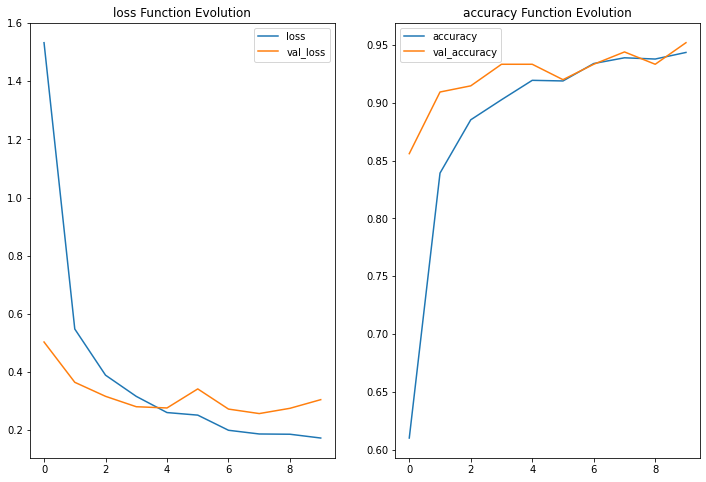

In [ ]:
hist = model.fit(train_ds, validation_data=valid_ds, epochs=10)
plot_hist(hist)

In [ ]:
model.save('10_epochs_transfer')

2022-02-18 12:49:50.726776: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
def unfreeze_model(model):
    # ensure that model.trinable hasn't been set (it would change all layers' trainability)
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])


unfreeze_model(model)

Epoch 1/10
291/291 [==============================] - 355s 1s/step - loss: 0.1062 - accuracy: 0.9652 - val_loss: 0.2596 - val_accuracy: 0.9573
Epoch 2/10
291/291 [==============================] - 341s 1s/step - loss: 0.0731 - accuracy: 0.9759 - val_loss: 0.2503 - val_accuracy: 0.9627
Epoch 3/10
291/291 [==============================] - 341s 1s/step - loss: 0.0602 - accuracy: 0.9795 - val_loss: 0.2336 - val_accuracy: 0.9573
Epoch 4/10
291/291 [==============================] - 342s 1s/step - loss: 0.0548 - accuracy: 0.9812 - val_loss: 0.2530 - val_accuracy: 0.9573
Epoch 5/10
291/291 [==============================] - 342s 1s/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.2343 - val_accuracy: 0.9547
Epoch 6/10
291/291 [==============================] - 343s 1s/step - loss: 0.0378 - accuracy: 0.9879 - val_loss: 0.2354 - val_accuracy: 0.9547
Epoch 7/10
291/291 [==============================] - 344s 1s/step - loss: 0.0382 - accuracy: 0.9905 - val_loss: 0.2346 - val_accuracy: 0.9600

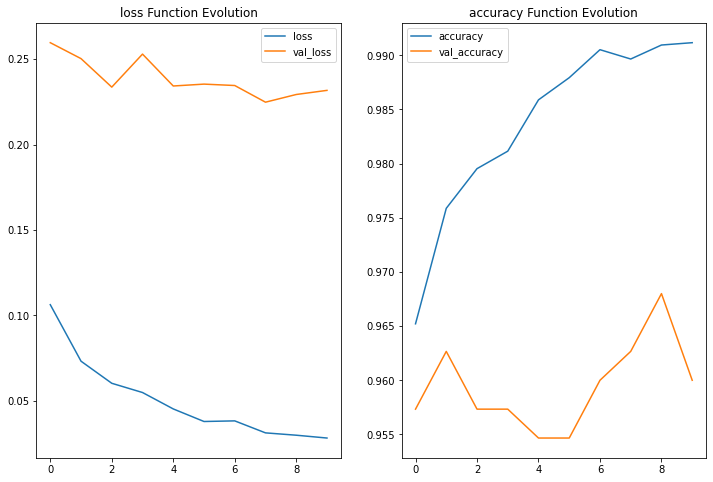

In [ ]:
epochs = 10  # @param {type: "slider", min:8, max:50}
hist = model.fit(train_ds, epochs=epochs, validation_data=valid_ds)
plot_hist(hist)

In [ ]:
model.save('10_epochs_transfer_10_epochs_finetune.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model = tf.keras.models.load_model('10_epochs_transfer_10_epochs_finetune.h5')

In [ ]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(test_ds), axis=-1)
y_test = np.concatenate(
    [label for batch, label in test_ds.as_numpy_iterator()])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         5
           4       0.83      1.00      0.91         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       0.83      1.00      0.91         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.83      1.00      0.91         5
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         5
          17       1.00    